# Digit Classification

### Name = Pravek Sharma

### Import Libararies like tensorflow and matplotlib as and when necessary, followed by downloading of the dataset.

In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11493376/11490434 [==============================] - 4s 0us/step


(60000, 28, 28)

### We read the dataset and visualize it.

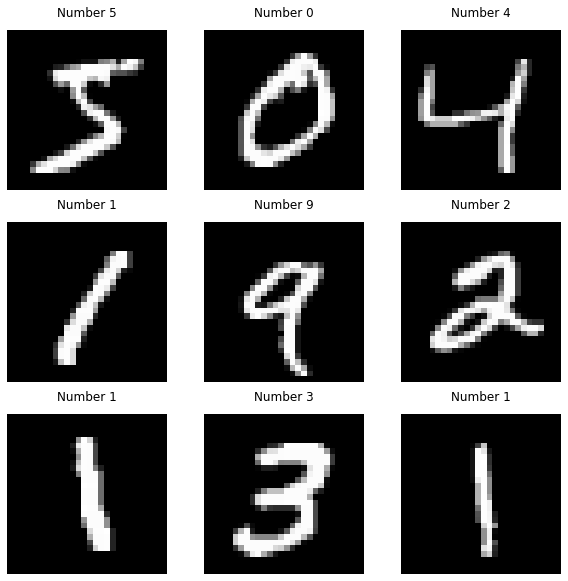

In [13]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 3, figsize = (10,10))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))

### We reshape the training and testing distributions for better training of the machine learning model

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [20]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape: ', x_train.shape)
print('Number of images in x_train: ', x_train.shape[0])
print('Number of images in x_test: ', x_test.shape[0])

x_train shape:  (60000, 28, 28, 1)
Number of images in x_train:  60000
Number of images in x_test:  10000


### We now import various layers for our convolutional neural network to work properly.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

### Compilig our CNN model and fitting it, provides us with the loss and accuracy per epoch.

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x=x_train,y=y_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2140 - accuracy: 0.9352
Epoch 2/2
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0868 - accuracy: 0.9738


### The evaluation provides wit hthe performance of the model as a whole on the x_test and y_test dataset distribution, which were totally unkown to the model.

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0608 - accuracy: 0.9797


[0.06079629436135292, 0.9797000288963318]